In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline


In [4]:
# Loading Data
boston_data = load_boston()
print(boston_data.data.shape)

(506, 13)


In [5]:
boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
boston['target'] = pd.Series(boston_data.target)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# In original dataset there is no missings
print('Dataframe Null values:',boston.isnull().values.ravel().sum())

Dataframe Null values: 0


In [7]:
# Number of unique categories
print ('Number of unique classes:\n',boston.nunique())

Number of unique classes:
 CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
target     229
dtype: int64


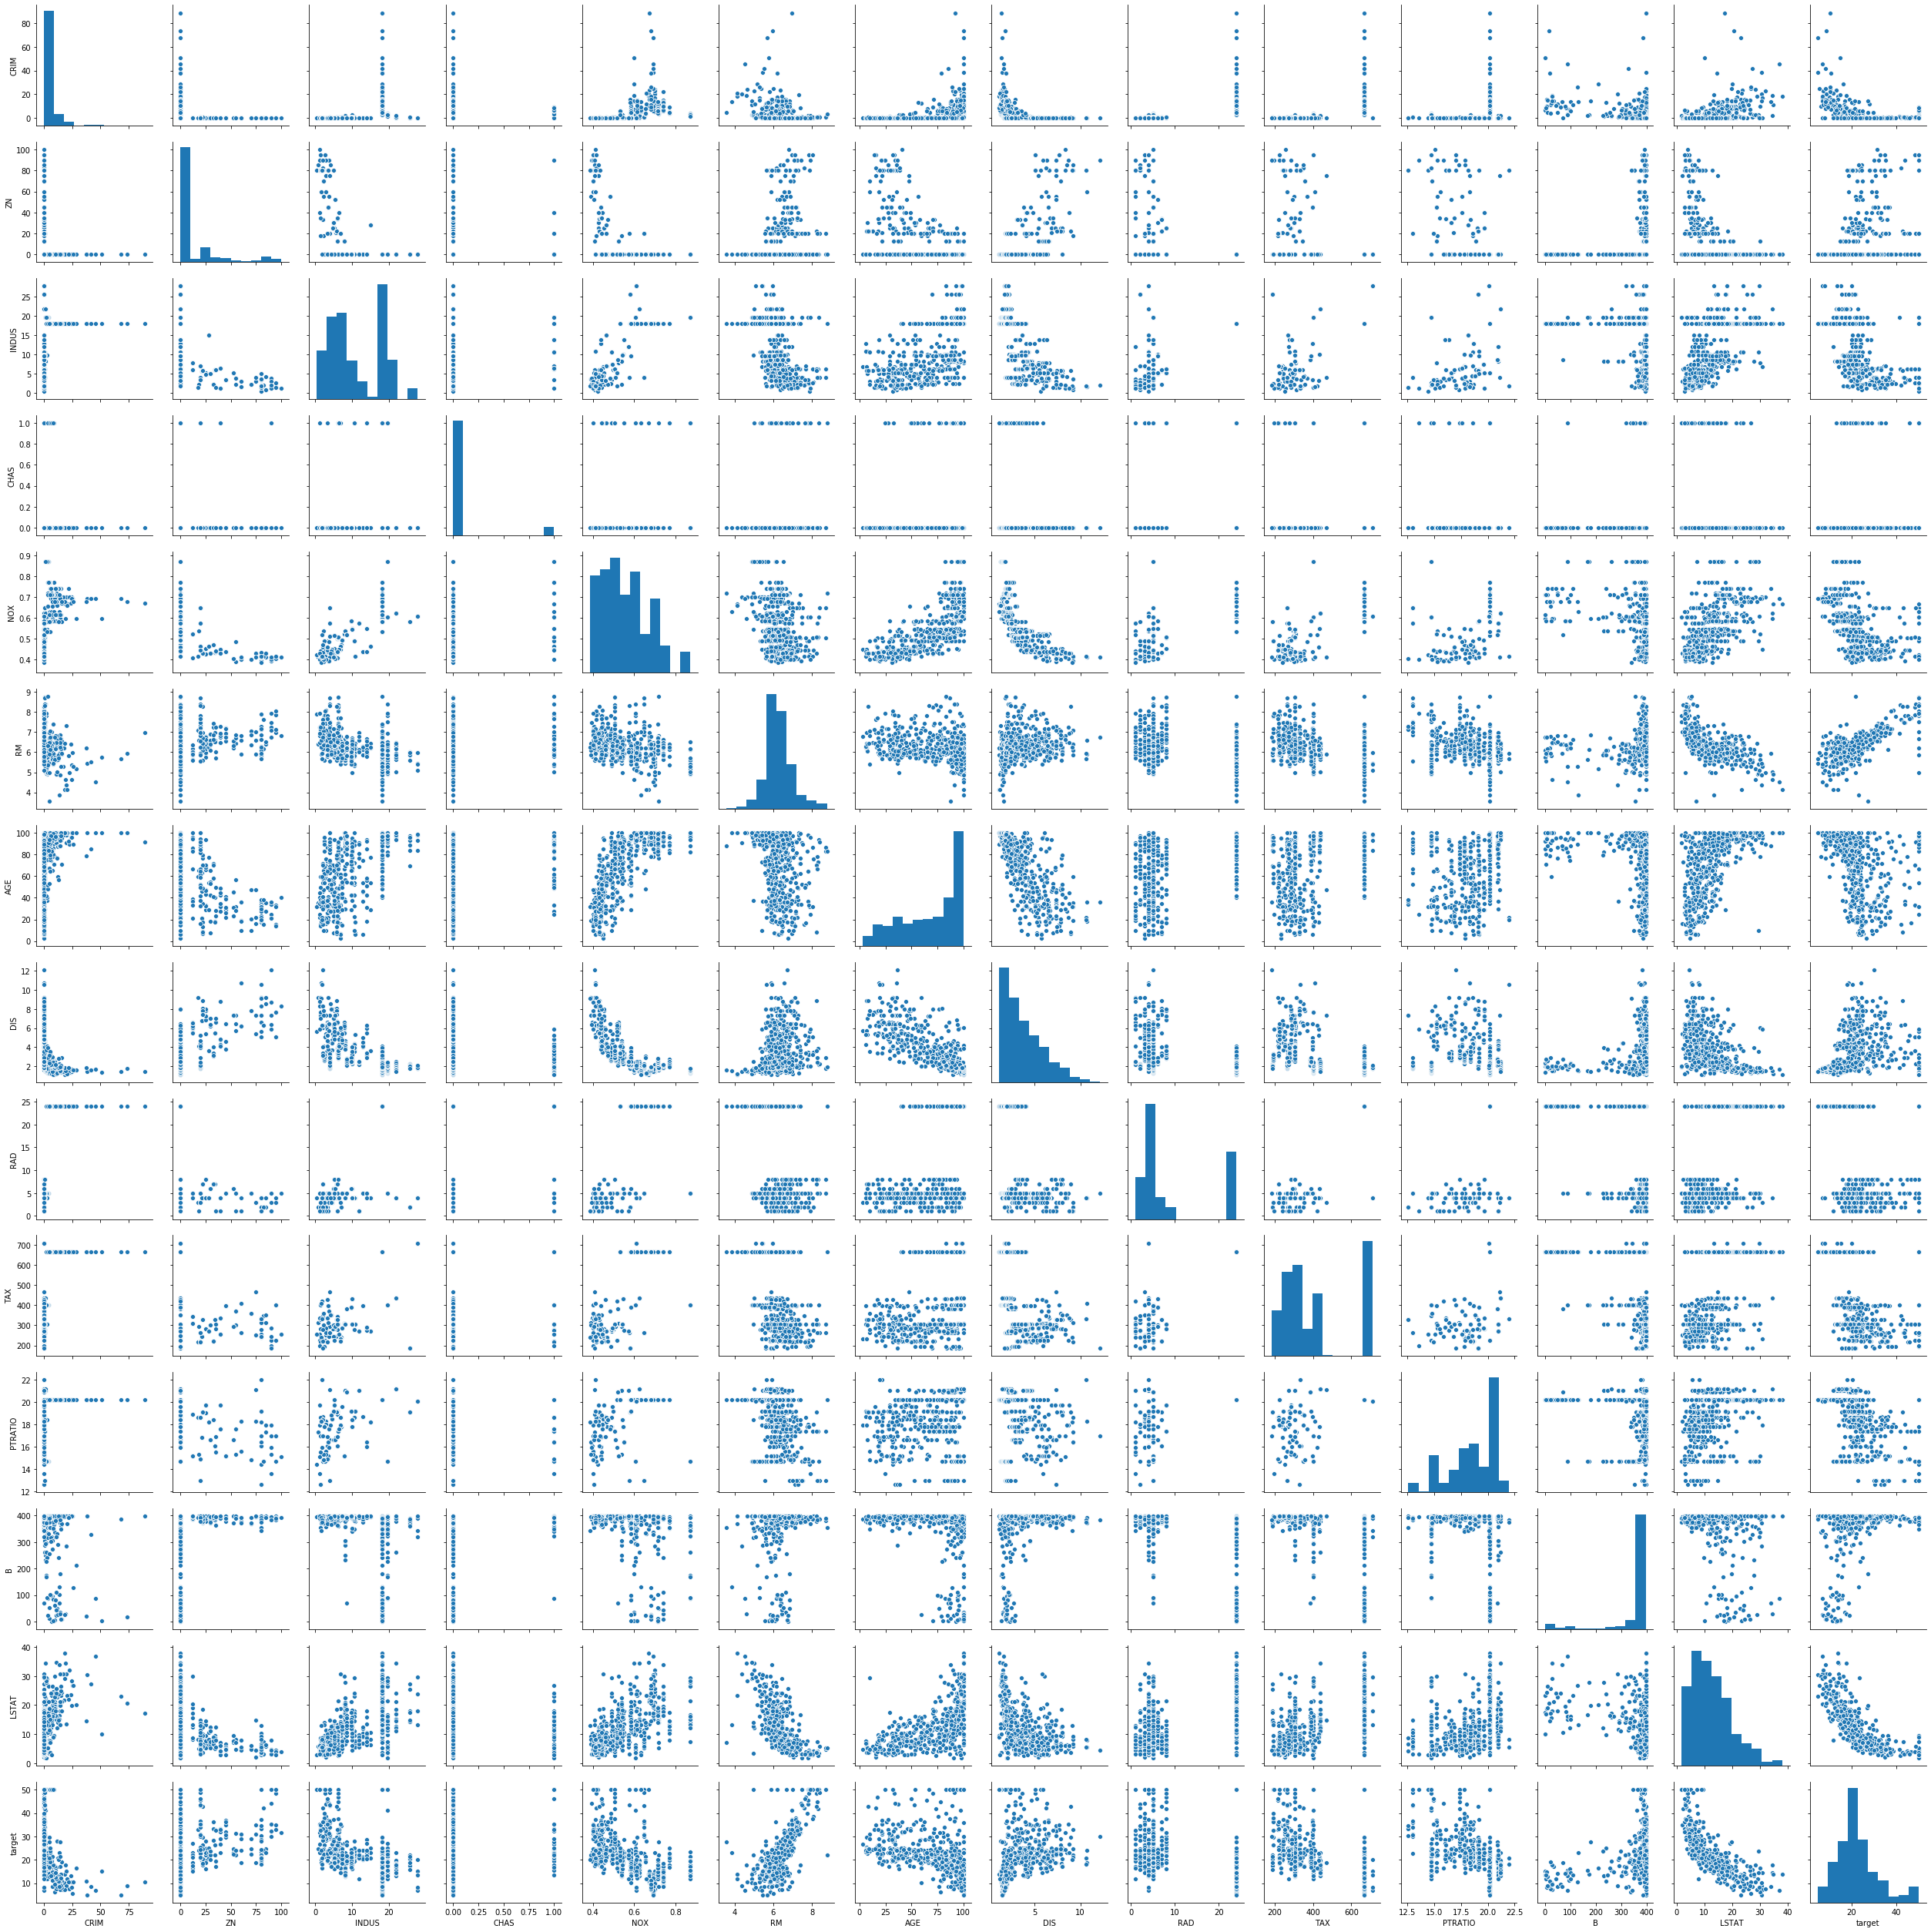

In [8]:
sns.pairplot(boston)

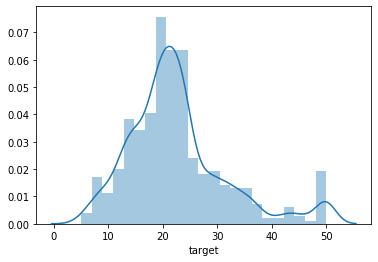

In [9]:
# Distribution plot of target variable which is MEDV
sns.distplot(boston['target'])

# Step 1:

Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results
What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison


In [10]:
# dividing dataset to two X as explanatory variables and Y as target variable
X=boston.iloc[:,0:13]
Y=boston['target']

In [11]:
# Fitting a line
model = LinearRegression().fit(X, Y)
baselineR2 = model.score(X, Y) 
print('Baseline R2:',baselineR2)
# the coefficients of different variables
model.coef_

Baseline R2: 0.7406426641094095


array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

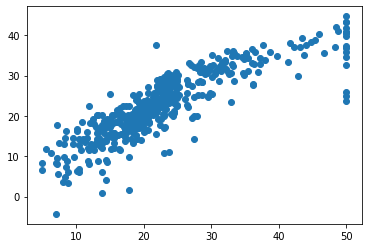

In [12]:
# graph to compare actual values and predicted values of target
baseline_predict=model.predict(X)
plt.scatter(Y, baseline_predict)

In [13]:
# Calculating Scores for the baseline regression
# mean square error
base_MSE=mean_squared_error(Y, baseline_predict)
print('Baseline MSE is:',base_MSE)
# mean_absolute_error
base_MAE=mean_absolute_error(Y,baseline_predict)
print('Baseline MAE is:',base_MAE)
# r2_score
base_R2=r2_score(Y, baseline_predict)
print('Baseline R2 score is:',base_R2)

Baseline MSE is: 21.894831181729202
Baseline MAE is: 3.2708628109003164
Baseline R2 score is: 0.7406426641094095


# Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.


In [14]:
def step2_results(dataset,target,percent,imp_var,strategy):
    # Set percentage of values randomly to NA
    if percent != 0:
        np.random.seed(42)
        indexer = np.sort(np.random.permutation(len(dataset))[len(dataset)-(int(len(dataset)*percent)):])
        dataset_imp = dataset.copy()
        # Chose LSTAT varialbe to randomly set to NaN. Chose LSTAT becuase of the 
        # large t-statistic in the original analysis
        dataset_imp[imp_var][indexer] = np.nan
        
        imp_model = SimpleImputer(missing_values=np.nan, strategy=strategy)
        imp_model.fit(dataset_imp)
        
        imp_model = pd.DataFrame(imp_model.transform(dataset_imp),columns=dataset.columns, index=dataset.index)
    else:
        imp_model = dataset.copy()
    
    newX = sm.add_constant(imp_model)
    regOLS_imp = sm.OLS(target,newX).fit()
    target_pred = model.predict(imp_model)
    mse = mean_squared_error(target, target_pred)
    mae=mean_absolute_error(target, target_pred)
    #r2=r2_score(target, target_pred)
    return((percent,regOLS_imp._results.rsquared,regOLS_imp._results.rsquared_adj,
            regOLS_imp._results.bic,mse,mae,imp_model))


In [15]:
results_boston = pd.DataFrame([])
per_num = [0.0,0.01,0.05,0.10,0.20,0.33,0.50]
imp_var = ['LSTAT'] #Choose from CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
strategy = 'mean' #Choose from 'mean', 'median', 'constant'
#fill_value = 0 # If you choose 'constant', need to select value to fill NaNs

In [16]:
for i in range(len(per_num)):
    results_boston[i] = np.array(step2_results(X,Y,per_num[i],imp_var[0],strategy), dtype=object)
results_boston


/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Metho

,0,1,2,3,4,5,6
0,0,0.01,0.05,0.1,0.2,0.33,0.5
1,0.740643,0.740284,0.74196,0.736645,0.723877,0.705228,0.693047
2,0.73379,0.733422,0.735141,0.729686,0.716581,0.697439,0.684937
3,3084.78,3085.48,3082.2,3092.52,3116.48,3149.55,3170.03
4,21.8948,21.9267,21.8036,22.3124,23.7501,26.4928,29.6531
5,3.27086,3.27201,3.25034,3.29426,3.38542,3.58905,3.80155
6,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...,CRIM ZN INDUS CHAS NOX RM...


In [17]:
results_boston = results_boston.T
results_boston.columns=['Imputed_Percent','RSquared','AdjRSquared','BIC','MSE','MAE','Model']

print(results_boston.loc[:,results_boston.columns !='Model']) # Prints results of analysis for each percent of Imputed variables

  Imputed_Percent  RSquared AdjRSquared      BIC      MSE      MAE
0               0  0.740643     0.73379  3084.78  21.8948  3.27086
1            0.01  0.740284    0.733422  3085.48  21.9267  3.27201
2            0.05   0.74196    0.735141   3082.2  21.8036  3.25034
3             0.1  0.736645    0.729686  3092.52  22.3124  3.29426
4             0.2  0.723877    0.716581  3116.48  23.7501  3.38542
5            0.33  0.705228    0.697439  3149.55  26.4928  3.58905
6             0.5  0.693047    0.684937  3170.03  29.6531  3.80155


Text(0.5, 1.0, 'Mean Absolute Error vs Imputed Percentage')

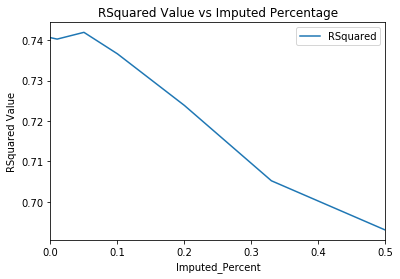

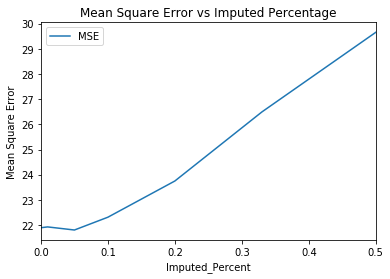

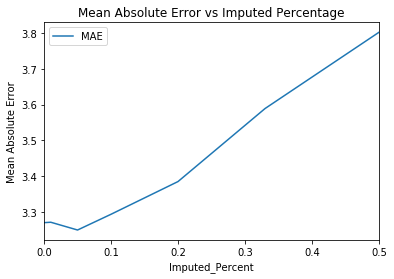

In [18]:
# Plot of R2 values analysis results vs different Percentage of Imputation
results_boston.plot('Imputed_Percent','RSquared')
plt.ylabel('RSquared Value')
plt.title('RSquared Value vs Imputed Percentage')

# Plot of MSE values analysis results vs different Percentage of Imputation
results_boston.plot('Imputed_Percent','MSE')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Imputed Percentage')

# Plot of MAE values analysis results vs different Percentage of Imputation
results_boston.plot('Imputed_Percent','MAE')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Imputed Percentage')

       25%        50%        75%  Imputed_Percent  count    max       mean  \
0   6.9500  11.360000  16.955000             0.00  506.0  37.97  12.653063   
1   7.0375  11.430000  16.860000             0.01  506.0  37.97  12.636527   
2   7.2050  11.975000  16.462500             0.05  506.0  37.97  12.642079   
3   7.4400  12.465000  16.297500             0.10  506.0  37.97  12.673947   
4   7.8900  12.833432  15.707500             0.20  506.0  37.97  12.833432   
5   9.2825  12.892088  14.180000             0.33  506.0  37.97  12.892088   
6  11.6975  12.751067  12.751067             0.50  506.0  36.98  12.751067   

    min       std  
0  1.73  7.141062  
1  1.73  7.113619  
2  1.73  6.993045  
3  1.73  6.800013  
4  1.92  6.530622  
5  2.47  6.029979  
6  2.87  5.079960  


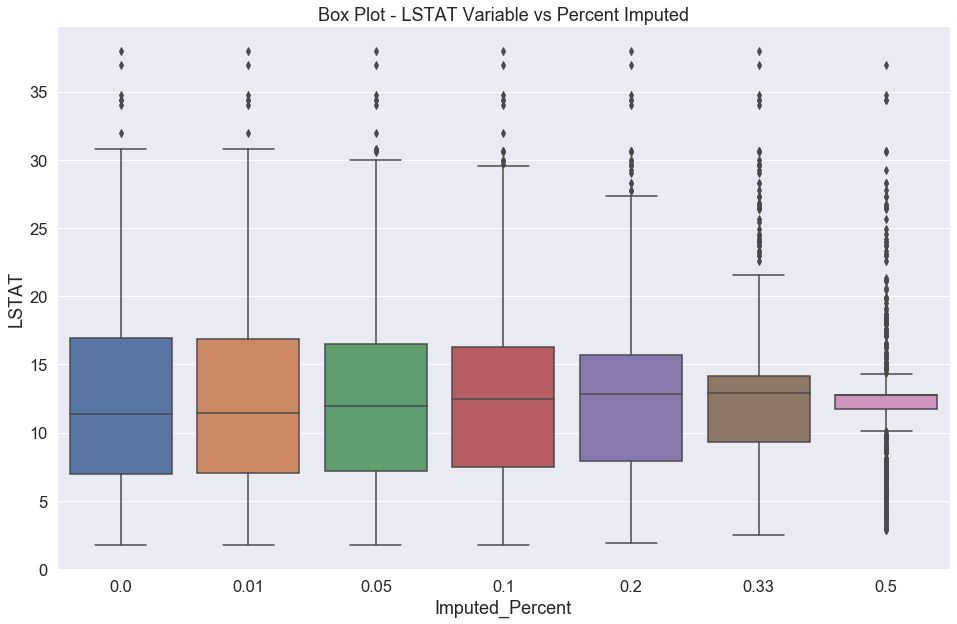

In [19]:
imputed_dataframe = pd.DataFrame([])
plot_result = pd.DataFrame([])
for k in range(0,len(results_boston)):
    imputed_dataframe = results_boston.Model[k]
    imputed_dataframe['Imputed_Percent'] = per_num[k]
    plot_result = plot_result.append(imputed_dataframe, ignore_index=True)

#  Boxplot of Imputed Variable vs different Percentage of Imputation
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
ax = sns.boxplot(x="Imputed_Percent", y="LSTAT", data=plot_result)
ax.set_title('Box Plot - LSTAT Variable vs Percent Imputed')


summaryResult = pd.DataFrame([])
for k in range(0,len(results_boston)):
    tempResults = results_boston.Model[k]['LSTAT'].describe()
    tempResults['Imputed_Percent']=per_num[k]
    summaryResult = summaryResult.append(tempResults, ignore_index=True)

print(summaryResult)

# Step 3: 
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

In [20]:
# Create a function that perform imputation and fit the model and return the results
def step3_results(dataset,target,percent,ran_seed,cond_var,cond_var_val,imp_var,strategy,fill_value=None):
    datasetDesc = dataset.describe()
    
    if percent != 0:
        Prob3SubIndex = dataset[dataset[cond_var] > datasetDesc.loc[cond_var_val][cond_var]].index
        lenIndex = len(dataset[dataset[cond_var] > datasetDesc.loc[cond_var_val][cond_var]])
        from sklearn.impute import SimpleImputer
        for i in range(len(imp_var)):   
            np.random.seed(ran_seed[i])
            indexer = np.sort(np.random.permutation(Prob3SubIndex)[lenIndex-(int(lenIndex*percent)):])
            step3[imp_var[i]][indexer] = np.nan
            
            imp_modelP3 = SimpleImputer(missing_values=np.nan, strategy=strategy,fill_value=fill_value)
            imp_modelP3.fit(dataset)
                
            imp_modelP3 = pd.DataFrame(imp_modelP3.transform(dataset),columns=dataset.columns, index=dataset.index)
    else:
        imp_modelP3 = dataset.copy()

    X = sm.add_constant(imp_modelP3)
    regOLS_impP3 = sm.OLS(target,X).fit()
    regOLS_impP3.summary()
    regOLS_impP3._results.rsquared
    target_pred = model.predict(imp_modelP3)
    mse = mean_squared_error(target, target_pred) # Not sure about MSE values
    mae=mean_absolute_error(target, target_pred)
    #r2=r2_score(target, target_pred)
    return((percent,regOLS_impP3._results.rsquared,regOLS_impP3._results.rsquared_adj,
            regOLS_impP3._results.bic,mse,mae))

In [21]:
per_numP3 = [0.0,0.10,0.20, 0.30]  # Percentage of imputed values in dataset
ran_seed = [42,39] #Random seed numbers for permutation
cond_var = 'B'   #Choose from CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cond_var_val ='25%'   # Choose from 25%, 50%, 75%, mean,min
imp_var = ['LSTAT','PTRATIO'] #Choose from CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
strategy = 'constant' #Choose from 'mean', 'median', 'constant'
fill_value = 0 # If you choose 'constant', need to select value to fill NaNs

In [22]:
step3 = X.copy() # Making copy of original dataset
#Prob3.describe()
results_bostonP3 = pd.DataFrame([]) # Initalizing results dataframe
for j in range(len(per_numP3)):
    results_bostonP3[j] = np.array(step3_results(step3,Y,per_numP3[j],ran_seed,cond_var,cond_var_val,imp_var,strategy,fill_value))

results_bostonP3 = results_bostonP3.T
results_bostonP3.columns=['Imputed_Percent','RSquared','AdjRSquared','BIC','MSE', 'MAE']

print(results_bostonP3) # Prints results of analysis for each percent of Imputed variables

   Imputed_Percent  RSquared  AdjRSquared          BIC         MSE       MAE
0              0.0  0.740643     0.733790  3084.780107   21.894831  3.270863
1              0.1  0.689204     0.680991  3176.331366   49.603132  4.641759
2              0.2  0.673673     0.665050  3201.005075   85.049769  6.173194
3              0.3  0.669940     0.661219  3206.760885  123.488223  7.651486


/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Metho

Text(0.5, 1.0, 'Mean Absolute Error vs Imputed Percentage')

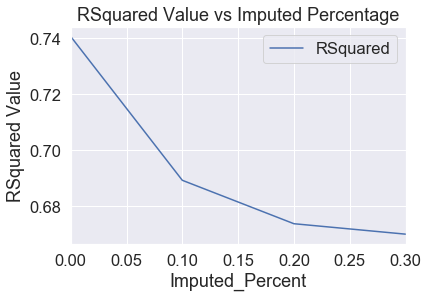

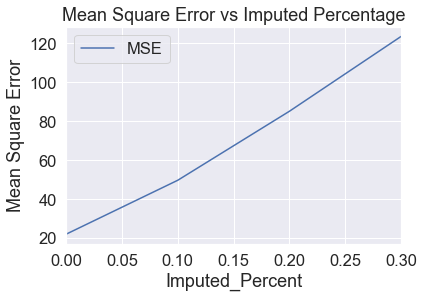

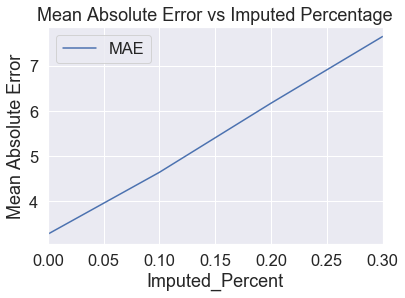

In [23]:
results_bostonP3.plot('Imputed_Percent','RSquared')
plt.ylabel('RSquared Value')
plt.title('RSquared Value vs Imputed Percentage')

# Plot of MSE values analysis results vs different Percentage of Imputation
results_bostonP3.plot('Imputed_Percent','MSE')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Imputed Percentage')

# Plot of MAE values analysis results vs different Percentage of Imputation
results_bostonP3.plot('Imputed_Percent','MAE')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Imputed Percentage')


# Step 4:  
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

In [24]:
def step4_results(dataset,target,percent,imp_var,strategy,fill_value=None):
    # Set 25% percent of values to NA, selecting every 4th entry
    dataset_imp = dataset.copy()
    indexer = dataset_imp.iloc[::4, :].index
    dataset_imp[imp_var][indexer] = np.nan
    
    
    imp_model = SimpleImputer(missing_values=np.nan, strategy=strategy,fill_value=fill_value)
    imp_model.fit(dataset_imp)
    
    imp_model = pd.DataFrame(imp_model.transform(dataset_imp),columns=dataset.columns, index=dataset.index)
    
    X = sm.add_constant(imp_model)
    regOLS_imp = sm.OLS(target,X).fit()
    #regOLS_imp.summary()
    #regOLS_imp._results.rsquared
    target_pred = model.predict(imp_model)
    mse = mean_squared_error(target, target_pred) 
    mae=mean_absolute_error(target, target_pred)
    #r2=r2_score(target, target_pred)
    return((percent,regOLS_imp._results.rsquared,regOLS_imp._results.rsquared_adj,
            regOLS_imp._results.bic,mse,mae))

In [25]:
# our baseline was done with "LSTAT" column and in order to compare results, we do it the same column
imp_var = ['LSTAT']
strategy = 'mean' 
fill_value = 0 # If you choose 'constant', need to select value to fill NaNs
per_numP4 = [0.25]  # 25% of imputation

In [26]:
step4 = X.copy() # Making copy of original dataset
#Prob4.describe()
results_bostonP4 = pd.DataFrame([]) # Initalizing results dataframe
for j in range(len(imp_var)):
    results_bostonP4[j] = np.array(step4_results(step4,Y,per_numP4[j],imp_var[j],strategy,fill_value))

results_bostonP4 = results_bostonP4.T
results_bostonP4.columns=['PercentImputed','RSquared','AdjRSquared','BIC','MSE','MAE']

print(results_bostonP4) # Prints results of analysis for each percent of Imputed variables

   PercentImputed  RSquared  AdjRSquared          BIC       MSE       MAE
0            0.25  0.714808     0.707273  3132.827242  25.25198  3.496517


/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
# Now we just need to compare above results with the step1 results (baseline)

   AdjRSquared          BIC       MAE        MSE  PercentImputed  RSquared
0          NaN          NaN  3.270863  21.894831            0.00  0.740643
0     0.707273  3132.827242  3.496517  25.251980            0.25  0.714808


/Users/raminfarhanian/pythonThreeEnvironment/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Text(0.5, 1.0, 'Mean Absolute Error vs Imputed Percentage')

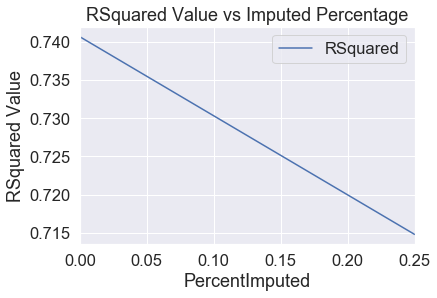

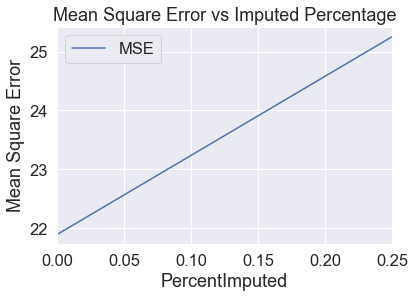

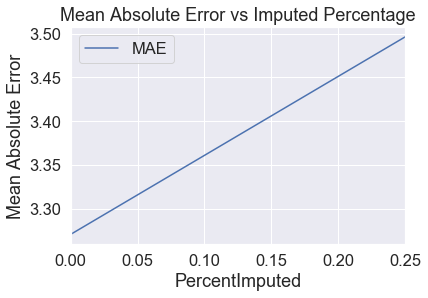

In [28]:
base_df = pd.DataFrame([])
base_df = base_df.append({'PercentImputed': 0, 'RSquared': baselineR2, 'MSE': base_MSE, 'MAE': base_MAE}, ignore_index=True)

baseline_comparison_df = pd.DataFrame(columns=results_bostonP4.columns)
baseline_comparison_df = baseline_comparison_df.append(base_df)
baseline_comparison_df = baseline_comparison_df.append(results_bostonP4)
print(baseline_comparison_df)

# Now we just need to compare above results with the step1 results (baseline)
# Plot of R2 values analysis results vs different Percentage of Imputation

baseline_comparison_df.plot('PercentImputed', 'RSquared')
plt.ylabel('RSquared Value')
plt.title('RSquared Value vs Imputed Percentage')

# Plot of MSE values analysis results vs different Percentage of Imputation
baseline_comparison_df.plot('PercentImputed', 'MSE')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Imputed Percentage')

# Plot of MAE values analysis results vs different Percentage of Imputation
baseline_comparison_df.plot('PercentImputed', 'MAE')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Imputed Percentage')



# Step 5 (Extra Credit) (10 points):
Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC. 

/Users/raminfarhanian/pythonThreeEnvironment/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/raminfarhanian/pythonThreeEnvironment/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


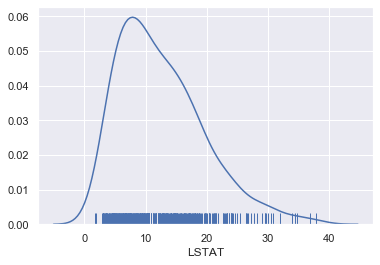

In [38]:

dataset = X.copy()
imputed_variable_name = 'LSTAT'
imputed_dataset = dataset.copy()
indexer = imputed_dataset.iloc[::4, :].index
imputed_dataset[imputed_variable_name][indexer] = np.nan
sns.set(color_codes=True)
sns.distplot(imputed_dataset['LSTAT'], hist=False, rug=True);
